In [ ]:
# ML: Задача уменьшения размерности : Метод главных компонент (PCA)


## Пример 

## Для решения задачи машинного обучения требуется: 

## 1) данные - набор данных Iris 

## 2) определить тип решаемой задачи - задача уменьшения размерности

## 3) определить мертики оценки - 

## 4) определить способ визуализации результатов - matplotlib

## 5) определить метод решения - Метод главных компонент

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


In [11]:
# Загрузка данных из файла
file_path = "./heart.csv"  # Укажите путь к вашему файлу
data = pd.read_csv(file_path)
data.dropna(inplace=True)  # Удаляем все строки с NaN
# Вывод первых строк для проверки
print(data.head())

label_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
label_encoder = LabelEncoder()

for column in label_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Разделение данных на X (данные) и y (целевую переменную)
X = data.drop(columns=['HeartDisease'])  # Убираем 'HeartDisease', оставляем только признаки
y = data['HeartDisease']  # Целевая переменная

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [12]:
X, y

(     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
 0     40    1              1        140          289          0           1   
 1     49    0              2        160          180          0           1   
 2     37    1              1        130          283          0           2   
 3     48    0              0        138          214          0           1   
 4     54    1              2        150          195          0           1   
 ..   ...  ...            ...        ...          ...        ...         ...   
 913   45    1              3        110          264          0           1   
 914   68    1              0        144          193          1           1   
 915   57    1              0        130          131          0           1   
 916   57    0              1        130          236          0           0   
 917   38    1              2        138          175          0           1   
 
      MaxHR  ExerciseAngina  Oldpeak  

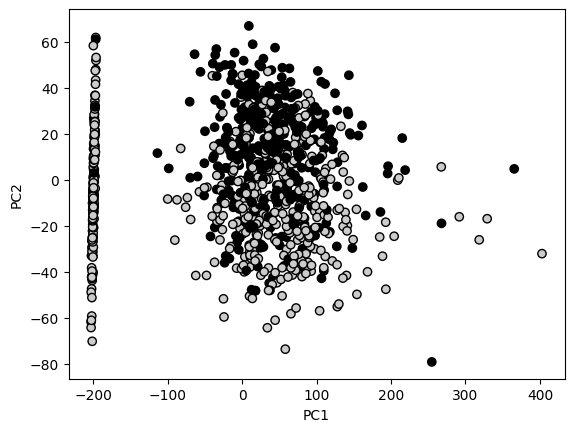

In [13]:
# Преобразуем y в числовой формат, если он еще не преобразован
if y.dtype != np.int64 and y.dtype != np.float64:
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Уменьшаем размерность с помощью PCA
pca = PCA(n_components=3)
X_new = pca.fit_transform(X)

# Выбираем значения для y_new
# Преобразуем метки так, чтобы они соответствовали желаемой форме
# Например, [1, 2, 0] в зависимости от уникальных меток в y
unique_classes = np.unique(y)
mapping = {cls: idx for idx, cls in enumerate(unique_classes)}
y_new = np.array([mapping[cls] for cls in y])

# Визуализация результатов
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap=plt.cm.nipy_spectral, edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [14]:
# РїР°СЂР°РјРµС‚СЂС‹ РјРµС‚РѕРґР°
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 3,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [15]:
# РІРєР»Р°Рґ РєР°Р¶РґРѕР№ РёР· РєРѕРјРїРѕРЅРµРЅС‚ РІ СЂР°Р·Р±СЂРѕСЃ РёСЃС…РѕРґРЅС‹С… РґР°РЅРЅС‹С…
pca.explained_variance_ratio_

array([0.92021836, 0.04913303, 0.02508167])

In [16]:
X_new

array([[ 92.31094761,  29.44092723,  12.02319453],
       [-17.14271772,  13.75128639,  31.48579995],
       [ 81.90549795, -38.22744601, -16.06512596],
       ...,
       [-69.00407582, -17.3379013 ,  -5.33858836],
       [ 39.207459  ,  33.59828595,   6.12276654],
       [-21.43666353,  37.22417628,  13.58462592]])

In [17]:
X_new.shape

(918, 3)

In [18]:
pca_2 = decomposition.PCA(n_components=4)
X_new_2 = pca_2.fit_transform(X)
pca_2.explained_variance_ratio_

array([0.92021836, 0.04913303, 0.02508167, 0.00533062])

In [19]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
import seaborn as sns

# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

In [20]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [21]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

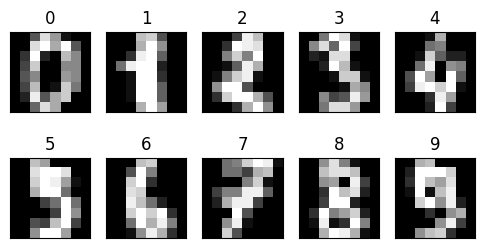

In [22]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [24]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

## Параметры (пример задания)

*  n_components=2, # значение по умолчанию=2. � азмерность вложенного пространства.
*  perplexity=10, # значение по умолчанию=30.0. Перплексия связана с количеством ближайших соседей, которое используется в других алгоритмах обучения на множествах.
*  early_exaggeration=12, # значение по умолчанию=12.0. Определяет, насколько плотными будут естественные кластеры исходного пространстве во вложенном пространстве и сколько места будет между ними. 
*  learning_rate=200, # значение по умолчанию=200.0. Скорость обучения для t-SNE обычно находится в диапазоне [10.0, 1000.0]. Если скорость обучения слишком высока, данные могут выглядеть как "шар", в котором любая точка приблизительно равноудалена от ближайших соседей. Если скорость обучения слишком низкая, большинство точек могут быть похожими на сжатое плотное облако с незначительным количеством разбросов. 
*  n_iter=5000, # значение по умолчанию=1000. Максимальное количество итераций для оптимизации. Должно быть не менее 250.
*  n_iter_without_progress=300, # значение по умолчанию=300. Максимальное количество итераций без прогресса перед прекращением оптимизации, используется после 250 начальных итераций с ранним преувеличением.
*  min_grad_norm=0.0000001, # значение по умолчанию=1e-7. Если норма градиента ниже этого порога, оптимизация будет остановлена.
*  metric='euclidean', # значение по умолчанию='euclidean', Метрика, используемая при расчете расстояния между экземплярами в массиве признаков.
*  init='random', {'random', 'pca'} или ndarray формы (n_samples, n_components), значение по умолчанию='random'. �?нициализация вложения.
*  verbose=0, # значение по умолчанию=0. Уровень детализации.
*  random_state=42, # экземпляр RandomState или None, по умолчанию=None. Определяет генератор случайных чисел. Передача int для воспроизводимых результатов при многократном вызове функции.
*  method='barnes_hut', # значение по умолчанию='barnes_hut'. По умолчанию алгоритм вычисления градиента использует аппроксимацию Барнса-Хата, работающую в течение времени O(NlogN). метод='exact' будет работать по более медленному, но точному алгоритму за время O(N^2). Следует использовать точный алгоритм, когда количество ошибок ближайших соседей должно быть ниже 3%.
*  angle=0.5, # значение по умолчанию=0.5. �?спользуется только если метод='barnes_hut' Это компромисс между скоростью и точностью в случае T-SNE с применением алгоритма Барнса-Хата.
*  n_jobs=-1, # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.

In [25]:
digits_proj = TSNE(random_state=RS).fit_transform(X)

In [27]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

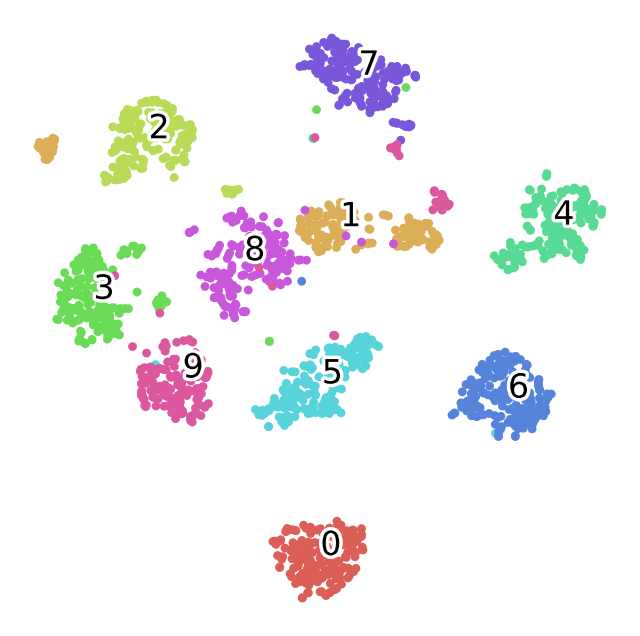

In [28]:
scatter(digits_proj, y)
plt.show()

In [29]:
!pip install umap-learn umap-learn[plot]

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [30]:
!pip show umap-learn[plot]

In [ ]:
# импорт библиотек


# для загрузки набора данных MNIST
import sklearn.datasets
from sklearn.datasets import load_digits

# для использования метода UMAP 
import umap
# для визуализации модели UMAP
import umap.plot

C:\Users\nik85\AppData\Roaming\Python\Python310\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
C:\Users\nik85\AppData\Roaming\Python\Python310\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
C:\Users\nik85\AppData\Roaming\Python\Python310\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  wa

In [ ]:
# грузим набор
digits = load_digits()

# строим модель
mapper = umap.UMAP(random_state=42).fit(digits.data)

C:\Users\nik85\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nik85\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: >

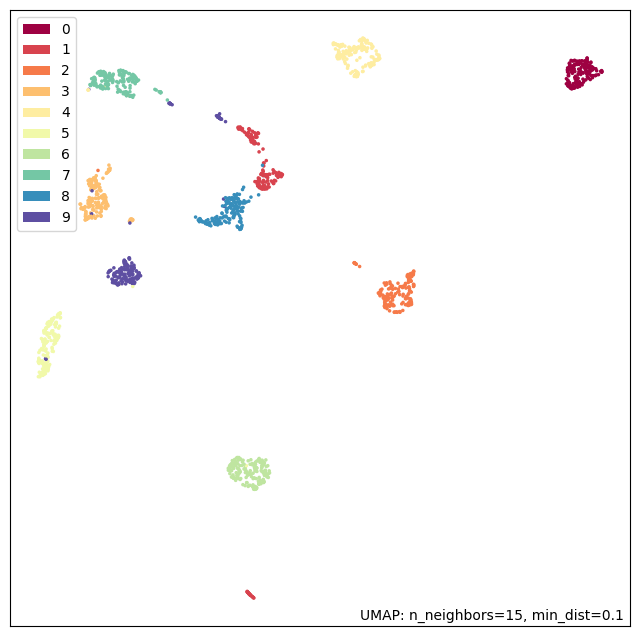

In [33]:
# отображаем на графике
umap.plot.points(mapper, labels=digits.target, width=800, height=800)

In [34]:
# смотрим параметры модели
mapper.get_params

<bound method BaseEstimator.get_params of UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})>

In [35]:
mapper

UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [36]:
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(digits.data)

C:\Users\nik85\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [37]:
embedding

array([[-1.8259712,  9.734485 ],
       [ 5.6385493,  6.5792103],
       [19.673359 ,  7.137559 ],
       ...,
       [ 8.218061 ,  5.2402315],
       [14.440541 , -1.2526573],
       [ 8.684129 ,  5.8862805]], dtype=float32)